## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [5]:
#Seu Código aqui....
aptos = pd.read_csv('./aptos.csv')
aptos.head(15)



,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-Metros: A metragem do apartamento (ex: na posição 0 apto tem 107 metros)

-Valor: O valor em dinheiro do apartamento (ex: na posição 0 o apto vale R$560 mil)

-Quartos: A quantidade de quartos que o apto possui (ex: na posição 0 o apto tem 3 quartos)

-Vagas: A quantidade de vagas que o apto possui (ex: na posição 0 o apto tem 2 vagas)

-Reformado: Se o apartamento está reformado ou não (ex: 0 que geralmente é negativo seria não, e 1 que geralmente é positivo seria sim)

-Bairro: Determina o bairro do apartamento (ex: na posição 0 o apto fica no bairro da Vila Lusitania)

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  ... Os apartamentos que possuem menor número de quartos, são mais baratos em valor.
2.  ... Quanto maior a metragem do apartamento, maior o valor de custo.
3.  ... Os apartamentos da Vila Lusitania tem uma média de valor parecida.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

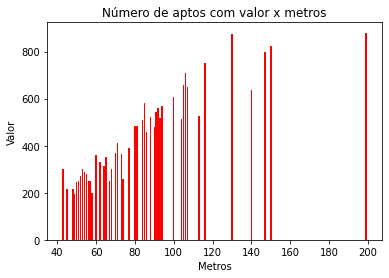

In [30]:
apt = pd.read_csv('./aptos.csv')




plt.bar(apt['metros'], apt['valor'], color="red")

# Aqui definimos as legendas de cada barra no eixo X


# A label para o eixo Y
plt.ylabel('Valor')

# A label para o eixo X
plt.xlabel('Metros')

# O título do gráfico
plt.title('Número de aptos com valor x metros')
 
# Chamamos o método show() para mostrar o gráfico na tela
plt.show()






### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

    O aprendizado supervisionado seria o mais correto, pois ele é baseado na classificação. Com isso, haveria a classificação de quantos quartos o apto possui, aonde ele está localizado, quantos metros possui e etc, e a partir dai podemos por exemplo ter um padrão de preço em determinado bairro com determinado número de quartos. 

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo de regressão linear
2. algoritimo de agrupamento 

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo de regressão linear: é usada para prever a relação de dois tipos de dados. E O linear vem da linha que é traçada para ver a relação entre os dados. É geralmente usada quando o dataset tem tendencia de aumneto ou diminuição constante.
2. algoritimo de agrupamento: ele serve para agrupar os dados conforme suas caracteristicas iguais/parecidas. 

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [33]:
#Seu Código aqui...







Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [34]:
#Seu Código aqui...







### Algoritmo 2

In [35]:
#Seu Código aqui...







Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | X | X |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:**

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [23]:
#Seu Código aqui...



## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**:

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:




